# Analisis y vizualización de Datos en Google Colab

Nuestro objetivo en este notebook será analizar un dataset e intentar contestar una serie de preguntas. Los datos corresponden a las coordenadas de la posición de un ratón a lo largo del tiempo en un Open Field. 

La serie de preguntas que buscamos conterstar son las siguientes:

*   **A)** ¿Que cantidad del tiempo se encuentra el ratón en el centro del recinto (total y porcentaje)?
*   **B)** ¿Se mueve mas rápido cuando está en el centro del recinto?
*   **C)** ¿Se mueve mas rápido en la primer, segunda o tercer parte del experimento?
*   **D)** ¿Que lugares del recinto habitó mas tiempo el ratón?

Para llegar obtener esta información y llegar a contestar estas preguntas vamos a precisar procesar, graficar y cuantificar los datos. 

**Aclaración:** Algunas de las pregutas que le hacemos al dataset no son usuales en el área, pero nos sirven para ejemplificar procesamientos.


### 1. Carpeta de Trabajo y Librerias

Primero, vamos a montarnos sobre el directorio de google Drive. Esto nos permitira leer y guardar archivos en nuestro Drive. Generamos la dirección `root_dir` (un string) que apunta a la carpeta de trabajo. Noten que al ejecutar el comando `mount`, google nos pedirá una contraseña la cual obtendremos mediante el link que aparece.

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Taller_Open_Source/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Si usamos un entorno de ejecución remoto en Google Colab (i.e. corremos el programa en una servidor de google) , este posee una serie de librerias muy usadas ya instaladas, es decir que para usarlas solo hace falta importarlas. Las librerias con las que trabajaremos en este notebook serán:
*   **Numpy**: Libreria de manejo de vectores y matrices, escencial para cualquier trabajo numérico en Python. 
*   **Pandas**: Librería para el manejo de tablas de datos ("Planillas de Excel" de Python). 
*   **Matplotlib**: La librería para graficar más usada en Python. Es muy flexible, pero lleva "trabajo" (más lineas de codigo) llegar a gráficos complejos.
*   **Seaborn**: Librería para graficar de alto nivel, especialmente diseñada para trabajar con las tablas de datos de Pandas. Es menos flexible, pero permite hacer rápidamente gráficos complejos.

Recuerden siempre tener a mano la documentación de las librerias mientras trabajan.
Por ejemplo, la de Matplotlib https://matplotlib.org/3.3.1/ .

Vamos entonces a importar las librerías con las que trabajaremos:

In [3]:
# alias "as np" es costumbre dentro de python
# podriamos importar numpy "as pepito" 
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Cargar los datos y primera exploración

En esta primer sección vamos a importar los datos (que se encuentrar en un archivo txt) y ponerlos en un `Dataframe`. Los dataframes son los objetos con los que trabaja la librería Pandas, y sirven para guadar datos de una manera estructurada, es decir en una tabla con filas y columnas.

**Comentario**: Los datos con los que desees trabajar pueden venir con diferentees extensiones y formatos. La funcion `read_csv` es muy flexible y ofrece la posibilidad de leer varios tipos distintos de archivos, para saber como hacerlo recurre a la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) y googlea.

**Opción 1:** Podemos leer directamente un archivo desde una dirección web. En este caso vamos a leer un txt alojado en github:


In [42]:
# # Definiomos la dirección del archivo
# direccion_archivo = 'https://github.com/talleresopensource/ciclo-01/blob/master/encuentro1/mouse_data.txt'

# # Leemos el archivo desde una dirrección web
# df = pd.read_csv(direccion_archivo,names=['X_pixels','Y_pixels'])

**Opción 2:** Podemos leer un archivo alojado en nuestra carpeta de trabajo. Para esto debemos generar el path uniendo el nombre del archivo al nombre de la carpeta dentro del drive.

In [5]:
# Definiomos el Path a la locacion del archivo en nuestro Drive
path_archivo = root_dir + 'mouse_data.txt'

# Leemos el archivo, esto genera un Dataframe, al que llamamos df.
df = pd.read_csv(path_archivo,names=['X_pixels','Y_pixels'])

Inspeccionamos como son los datos levantados con la funcion `.head()`

In [6]:
# Esta funcion nos muestr los primeros 5 datos
df.head()

,X_pixels,Y_pixels
0,190,88
1,195,81
2,200,74
3,206,66
4,213,59


**Información del Dataset:** Estos son datos provinientes del tracking de un roedor en un Open Field. La frecuencia de sampleo (entre medición y medición) es de 20Hz y la posiciones (valores de X_pixels e Y_pixels) están medidas en pixeles.

Para averiguar la cantiudad filas y columnas de un Dataframe podemos usar el método ``` shape ```:



In [7]:
df.shape

(11900, 2)

**Ejercicio:** Correr las funciones que se implementan en la próxima celda. ¿Qué hacen? Pueden comentar y descomentar el código aprentando ```CTRL``` + ```/``` sobre la linea.


In [8]:
df.describe()
# df.tail()
# df.count()

,X_pixels,Y_pixels
count,11900.000000,11900.000000
mean,203.889916,243.779748
std,166.133654,171.446002
min,0.000000,0.000000
25%,42.000000,51.000000
50%,136.000000,283.000000
75%,392.000000,419.000000
max,472.000000,451.000000


**Pd:** Recuerden que si les quedan dudas respecto a que hace alguna de estas funciones, siemrpe pueden (deben) recurrir a la documentación!

Para finalizar esta primer exploración de dataset, vamos a graficar la distribución de valores que trae cada una de las variables. Usaremos la función `distplot` de `seaborn`. Les sugerimos explorar la [documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html) y modificar los parámetros para ver su efecto en los histogramas.

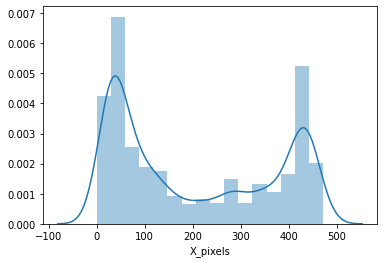

In [9]:
sns.distplot(df['X_pixels'], hist=True, kde=True, bins=None)
plt.show()

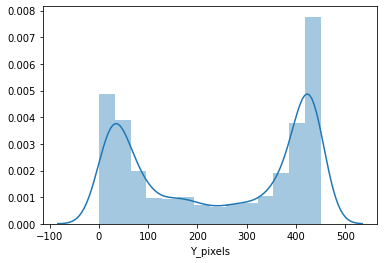

In [10]:
sns.distplot(df['Y_pixels'], hist=True, kde=True, bins=None)
plt.show()

### 2. Procesamiento de datos
En esta segunda sección vamos a operar sobre los datos de las coordenadas para generar nuevos campos que agregaremos como columnas al dataset.

#### 2.1 Pixels a cm
El primero procesamiento de los datos que haremos será transformar el valor de las columnas de pixels a centimetros. En nuestro experimento sabemos que 1 pixel corresponde a 0,104 cm. Entocnes crear un nuevo para de columnas llamadas `'X'` e `'Y'` cuyo contenido será igual al valor de las columnas `'X_pixels'` e `'Y_pixels'` multiplicado por este factor de conversión.

In [11]:
# Definimos dos nuevas columans del dataset
df['X'] = df['X_pixels'].multiply(0.104)
df['Y'] = df['Y_pixels'].multiply(0.104)

In [12]:
df.head()

,X_pixels,Y_pixels,X,Y
0,190,88,19.760,9.152
1,195,81,20.280,8.424
2,200,74,20.800,7.696
3,206,66,21.424,6.864
4,213,59,22.152,6.136


#### 2.2 Tiempos
Nuestro primer objetivo será crear una columna en el dataset que nos indique el tiempo.

Sabemos que los datos corresponden a mediciones hechas con una frecuencia de 20Hz, es decir, cada 0.05 segundos. 

In [13]:
# Frecuencia de Sampleo en Hz
sampling_rate = 20 

# Distancia temporal entre cada medición (0.05 seg en nuestro caso)
# usar 1.0 fuerza a python a expresar esta division como un float
# (Antiguamente python tenia default a la division entera)
paso_temporal = 1.0 / sampling_rate


Generamos entonces un vector que en cada posicion tenga el indicando el tiempo transcurrido.

In [14]:
# Numero de mediciones (filas)
num_filas = df.shape[0]

# Primero creamos un vector de ceros, donde luego guardaremos los tiempos
tiempos = np.zeros(num_filas)

# Definimos el primer tiempo como 0
tiempo_actual = 0.0

# Vamos a ir recorriendo el vector usando un for loop
for i in range(num_filas):
    # Guardamos el valor del tiempo actual la posicion i del vector
    tiempos[i] = tiempo_actual
    # Actualizamos el valor sumando un nuevo paso
    tiempo_actual = tiempo_actual + paso_temporal

In [15]:
tiempos

array([0.0000e+00, 5.0000e-02, 1.0000e-01, ..., 5.9485e+02, 5.9490e+02,
       5.9495e+02])

Se puede agregar esta columa al Dataframe de la siguiente forma:

In [16]:
df['Tiempo'] = tiempos
df.head()

,X_pixels,Y_pixels,X,Y,Tiempo
0,190,88,19.760,9.152,0.00
1,195,81,20.280,8.424,0.05
2,200,74,20.800,7.696,0.10
3,206,66,21.424,6.864,0.15
4,213,59,22.152,6.136,0.20


Vamos a generar una nueva columna que nos indique si estamos en el principio (primer tercio), en la mitad (segundo tercio) o en el final (tercer tercio) del tiempo del experimento.

Para esto precisamos crar una lista que contenga las palabras 'Principio', 'Mitad' y 'Final', segun el valor del tiempo

In [17]:
# Duración total del experiento (tomamos el ultimo elemento del vector)
tiempo_final = tiempos[-1]

# Primero creamos una lista vacia
momentos = []

# Recorremos el vector de tiempos y le vamos agregando elementos a la lista
for t in tiempos:
    
    # Si esta en el primer tercio
    if t < (tiempo_final/3):
        momentos.append('Principio')

    # Si esta en el segundo tercio
    elif t < (2*tiempo_final/3):
        momentos.append('Mitad')

    # Si esta en el tercer tercio
    else:
        momentos.append('Final')


Finalmente, agregamos esta columna al Dataframe.

In [18]:
df['Momento'] = momentos
df.head()

,X_pixels,Y_pixels,X,Y,Tiempo,Momento
0,190,88,19.760,9.152,0.00,Principio
1,195,81,20.280,8.424,0.05,Principio
2,200,74,20.800,7.696,0.10,Principio
3,206,66,21.424,6.864,0.15,Principio
4,213,59,22.152,6.136,0.20,Principio


Notemos que a diferencia de las anteriores, el contenido de esta columna son strings (texto) que pueden tomar un valor de una cantidad limitada de opciones (en este caso 3). A este estilo de columnas se las llama *Categóricas*.

**Comentario:** Como este porceso de crear una columna categórica a partir de una numérica es muy común, existe una funcionalidad para hacerlo en pandas llamada `pd.cut()`. Como un ejercicio adicional pueden repetir el mismo procesamiento que realizamos pero usando esta función. Para guiarse, recuerden siempre ver la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) y ayudarse con preguntas en [stackoverflow](https://stackoverflow.com/questions/18538920/python-r-cut-function).

#### 2.3 Cálculo de la velocidad
El objetivo en esta sección es generar una columna que contenga la velocidad intantánea del roedor en cada posición. Esta velocidad la calcularemos como la distancia recorrida por el roedor en cada paso, dividia por el paso temporal.

Primero tomamos los valores de las columnas `X` e `Y` del datset como arrays de `Numpy`.

In [19]:
X_vector = df['X'].values
Y_vector = df['Y'].values
print('X_vector es una variable de tipo:',type(X_vector))
print('Y_vector es una variable de tipo:',type(X_vector))

X_vector es una variable de tipo: <class 'numpy.ndarray'>
Y_vector es una variable de tipo: <class 'numpy.ndarray'>


In [20]:
print('X_vector tiene forma:',X_vector.shape)
print('Y_vector tiene forma:',Y_vector.shape)

X_vector tiene forma: (11900,)
Y_vector tiene forma: (11900,)


Nuestro primer objetivo es generar un vector que contenga la distancia recorrida entre medición y medición

In [21]:
# Generamos un vector de ceros para luego ir completando con los valores
distancias = np.zeros(num_filas)

# Recorremos las filas (cada una correspodne a una posición)
for i in range(num_filas-1):

    # Caculamos la distancia en cada coordenada
    # Dividimos por 100 para convertir los centimetro en metros
    dist_X = (X_vector[i+1] - X_vector[i])/100
    dist_Y = (Y_vector[i+1] - Y_vector[i])/100

    # Calculamos la distancia recorrida (Uusamos pitágoras)
    distancias[i+1] = np.sqrt(dist_X**2+dist_Y**2)

**Comentario:** Al igual que en la sección anterior, calcular la diferencia entre instancias consecutivas es un proceso muy común (es hacer una derivada numérica!). Es por esto que las librerías traen funciones ya implementadas para hacerlo. En general estas funciones no solo suelen ser mas prácticas, sino que también mucho mas eficientes. En este caso, podrían hacerlo directament en el Dataframe usando la función de pandas `pandas.DataFrame.diff()` o a nivel vector usando la función de numpy `np.diff()`.

Podemos luego facilmente calcular la velocidad instantanea dividiendo esta distancia por el paso temporal. Notemos que como la distancia está en metros y el paso temporal en segundos, la velocidad calculada estará en m/s.

In [22]:
velocidades = distancias / paso_temporal

**Ejercicio:** Agregar una columna llamada 'Velocidad' al Dataframe que contenga las velocidades para cada instancia.

In [23]:
df['Velocidad'] = velocidades
df.head()

,X_pixels,Y_pixels,X,Y,Tiempo,Momento,Velocidad
0,190,88,19.760,9.152,0.00,Principio,0.000000
1,195,81,20.280,8.424,0.05,Principio,0.178928
2,200,74,20.800,7.696,0.10,Principio,0.178928
3,206,66,21.424,6.864,0.15,Principio,0.208000
4,213,59,22.152,6.136,0.20,Principio,0.205909


#### 2.4 Centro del Campo

Por último, vamos agregarle al dataset una columa que nos indique si la posición donde está parado el roedor corresponde al centro del campo o no. 

Definimos como 'centro del campo' a la región que queda comprendida entre el 25% y el 75% de la extensión total en ambas coordenadas. Entonces, para empezar, vamos a calcular estas cantidades en cada coordenada.

In [24]:
# Usamos el maximo y el minimo del rango (una buena aprox)
# En la vida real, usar las coordenadas propias del open field 
X_25 = 0.25 * X_vector.max()
X_75 = 0.75 * X_vector.max()
Y_25 = 0.25 * Y_vector.max()
Y_75 = 0.75 * Y_vector.max()

Luego, debemos chequear si cada una de las posiciones cumple (o no) el estar en el 'centro'. 

Para lograrlo usaremos comparaciones lógicas. El siguietne bloque de código es para que exploren como funciona una comparación lógica simple.

In [25]:
array_simple = np.asarray([0,1,2,3,4])
logical = array_simple > 2
print(logical)

[False False False  True  True]


Ahora vamos entronces a generar un vector de valores lógicos (True o False) que nos indicque si esas coordenadas se encuentran dentro del centro.  

In [26]:
# Chequeamos cuando la coordenada X este en la región central
X_in_range =  (X_25 < X_vector)&(X_vector < X_75) # Este vector tendra un True si cumple ambas condiciones

# Chequeamos cuando la coordenada Y este en la región central
Y_in_range =  (Y_25 < Y_vector)&(Y_vector < Y_75)

# Chequeamos cuando ambas coordenadas cumplen la condicion
en_centro = (Y_in_range)&(X_in_range)

In [27]:
en_centro

array([False, False, False, ..., False, False, False])

**Ejercicio:** Agregar una columna llamada 'Centro' al Dataframe que contenga el vector lógico `en_centro`.

In [28]:
df['Centro'] = en_centro
df.head()

,X_pixels,Y_pixels,X,Y,Tiempo,Momento,Velocidad,Centro
0,190,88,19.760,9.152,0.00,Principio,0.000000,False
1,195,81,20.280,8.424,0.05,Principio,0.178928,False
2,200,74,20.800,7.696,0.10,Principio,0.178928,False
3,206,66,21.424,6.864,0.15,Principio,0.208000,False
4,213,59,22.152,6.136,0.20,Principio,0.205909,False


### 3. Respuestas 
En esta sección vamos a utilizar los datos que ordenamos en el Dataframe para responder cada una de las preguntas que nos planteamos al principio.

#### 3. **A)** ¿Que porcentaje del tiempo se encuentra el ratón en el centro del recinto?

Para responder esto debemos contar cuantas veces aparece el valor True en la columna 'Centro' y dividirlo por el total de filas. La funcion que nos ayudará a hacer facilmente eso es `value_counts()`.

In [29]:
df['Centro'].value_counts()

False    11410
True       490
Name: Centro, dtype: int64

In [30]:
# Guardamos la cantidad de mediciones en centro 
cuentas_centro = df['Centro'].value_counts()[1]

# Contamos la cantidad de mediciones totales
cuentas_totales = df.shape[0]

# Calculamos el porcentaje
porcentaje = 100 * (cuentas_centro/cuentas_totales)

print('Porcentaje de tiempo en el centro:', porcentaje)

Porcentaje de tiempo en el centro: 4.117647058823529


In [31]:
# mas adelante podemos visualizar el xy del animal coloreado segun columna Centro

También podemos usar seaborn para graficar las cuentas de mediciones dentro y fuera del centro.

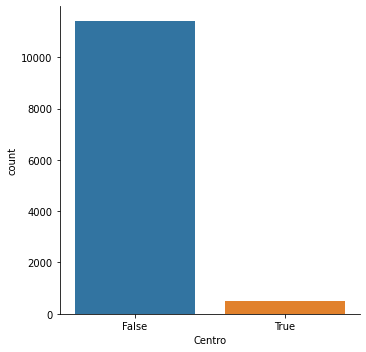

In [32]:
sns.catplot(x="Centro", data=df, kind="count")
plt.show()

#### 3.**B)** ¿Se mueve mas rápido cuando está en el centro del recinto?

Esta pregunta la podemos responder fácilmente con un gráfico que presente la estadística del valor en la columna 'Velocidad' segregada según el valor en la columna 'Centro'. 

En la celda a continuación se presentan varias maneras de representar estos datos con la función catplot de seaborn. Prueben comentrar y descomentar para ver los distintos estilos posibles. recuerden siempre tneer a mano la [documentación](https://seaborn.pydata.org/generated/seaborn.catplot.html).

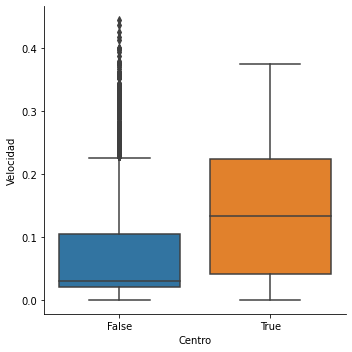

In [33]:
sns.catplot(x="Centro", y="Velocidad", data=df, kind="box")
# sns.catplot(x="Centro", y="Velocidad", data=df, kind="violin")
# sns.catplot(x="Centro", y="Velocidad", data=df, kind="bar")
# sns.catplot(x="Centro", y="Velocidad", data=df, kind="strip")
plt.show()

**Pregunta:** Mirando el gráfico generado ¿Como responderían a la preguntra?

#### **C)** ¿Se mueve mas rápido en la primer, segunda o tercer parte del experimento?

Esta pregunta la podemos responder de una manera analoga a la anterior. Pero esta vez buscamos graficar la estadística del valor en la columna 'Velocidad' segregada según el valor en la columna 'Momento'.

**Ejercicio:** Genere el grafico que permite responde a la pregunta.

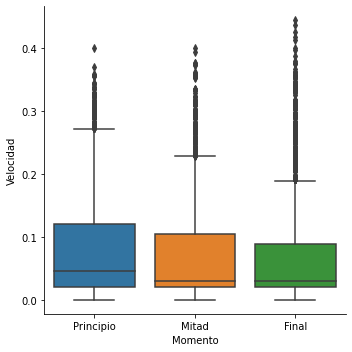

In [34]:
sns.catplot(x="Momento", y="Velocidad", data=df, kind="box")
# Para explorar luego: tratar de visualizar velocidad vs tiempo de la prueba

#### **D)** ¿Qué lugares del recinto habitó mas tiempo el ratón?

Para responder esta última pregunta, vamos a realizar una serie de graficos en el plano `X-Y`, y para esto vamos a utilizar la librería `marplotlib`.

Hagamos un primer gráfico muy simple para vizualizar es del recorrido:

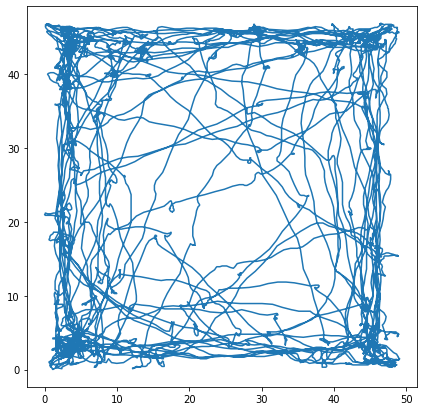

In [35]:
# Definimos la figura y el tamaño que tendrá
fig= plt.figure(figsize=(7,7))

# Realizamos un gráfico de linea
plt.plot(X_vector,Y_vector)

# Mostramos
plt.show()

Vamos a agregarle 

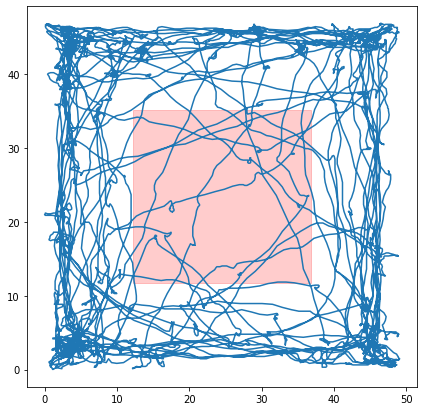

In [36]:
# Vertice inferior izquiero del centro del campo
vertice = (X_25,Y_25)

# Ancho de la zona central
ancho = (X_75-X_25)

# Alto de la zona central
alto = (Y_75-Y_25)

# Definimos la figura y el tamaño que tendrá
fig,ax= plt.subplots(figsize=(7,7))

# Dibujamos un rectangulo que delimita el centro
rectangulo = mpl.patches.Rectangle(vertice, ancho, alto, fill=True, alpha = 0.2, color='red')
ax.add_patch(rectangulo)

# Realizamos un gráfico de linea
plt.plot(X_vector,Y_vector)

# Mostramos
plt.show()

En el gráfico podemos observar (como ya sabíamos) que el roedor se movió mas por los bordes del recinto.

Una manera mas informativa de graficar las zonas por donde anduvo el ratón es haciendo un heatmap. Un heatmap es como un histograma pero en 2D, es decir, sobre un plano. Un ejemplo que todos vimos alguna vez es el que se usa en los analisis de partidos de futbol o basquet, en el cual se indica con colores las zonas de la cancha en donde jugó mas.


**Aclaración:** Los siguientes gráficos en matplotlib precisan unas lineas de codigo un poco mas cargadas. No se preocupen si no comprenden completamente estos codigos. Lo importante es saber que esta herramienta existe y saber que, si precisan realizar algo similar en el futuro, pueden volver a este notebook a copiar el bloque de código. 

In [37]:
# Precisamos importar la libreria scipy
from scipy.ndimage.filters import gaussian_filter

# Definimos una funcion que genera un heatmap suavizado
def heatmap_suavizado(x, y, s, bins=1000):
    # Generamos el histograma 2D a partir de las posiciones
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    # Suavizamos el histograma para que no quede con "cuadrados"
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

En la celda anterior lo que hicimos fue definir una función para generar el heatmap. 

En las siguiente celda la utilizamos par agraficar. Prueben cambiar la cantidad de bines y el valor del suavizado para notar el efectro que tiene en el gráfico.


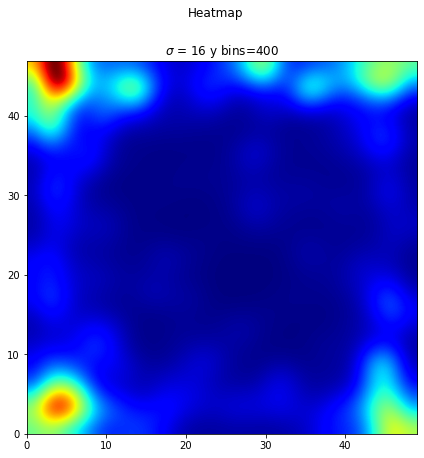

In [38]:
# Cantidad de bines que usamos en el histograma 2D
bins = 400

# Intensidad de Suavizado
sigma = 16

# Definimos la figura y el tamaño que tendrá
fig= plt.figure(figsize=(7,7))

# Generamos el heatmap llamando a la funcion que definimos
img, extent = heatmap_suavizado(X_vector, Y_vector, sigma, bins)

# Graficamos el heatmap
plt.imshow(img, extent=extent, origin='lower', cmap=mpl.cm.jet)

# Agregamos los títulos
plt.suptitle('Heatmap')
plt.title("$\sigma$ = %d y bins=%d" % (sigma,bins))

plt.show()


Como último ejercicio, sería interesante generar un gráfico en el cual grafiquemos no solamente las posiciones que ocupó el roedor, sino que además agreguemos también la información sobre la velocidad a la circulaba en cada una de estas posiciones. 

Para lograr esto vamos a usar la función scatter de matplotlib, en la cual a cada punto se le puede asignar un color que dependa de un valor numérico. En nuestro caso ese valor será la velocidad. 

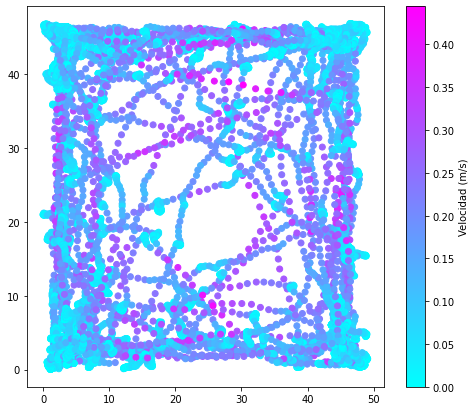

In [39]:
# Primero debemos normalizar el valor de la velocidad
max_velocidad = np.max(velocidades)
min_velocidad = np.min(velocidades)
velocidad_normalizada = velocidades/max_velocidad

# Definimos la figura y el tamaño que tendrá
fig= plt.figure(figsize=(8,7))

# Graficamos puntos con coordenadas X_vector e Y_vector, 
# pero esta vez agregamos en el parametro 'color' la inofrmación de las velocidades.
plt.scatter(X_vector,Y_vector, color=mpl.cm.cool(velocidad_normalizada))

## Pueden probar cambiar el estilo descomentando esta linea
## Prueben variando los parametros s, alpha y edgecolor
# plt.scatter(X_vector,Y_vector, color=mpl.cm.cool(velocidad_normalizada), s=45, edgecolor='none', alpha=0.6)

# Las siguientes lineas son para agregar la barra de referencia a la derecha
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=min_velocidad, vmax=max_velocidad)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='Velocidad (m/s)')

plt.show()

### 4. Guardando los Resultados 

Una vez que terminamos de procesar los datos, nos gustaría guardar el dataset con las columnas agregadas, para no tener que estar haciendo nuevamente todo el procesamiento cada vez que lo tenemos que volver a utilizar. Para esto vamos a usar la función `.to_csv()`. Esta función es muy flexible y permite guardar los datos en distintos tipos de formato, puden chequear la [documetnacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).


In [40]:
# Definiomos el Path a la locacion del archivo en nuestro Drive
# Elegimos el nombre del archivo: 'datos_procesados.csv'
path_nuevo_archivo = root_dir + 'datos_procesados.csv'

# Guardamos el dataset
df.to_csv(path_nuevo_archivo,index=False)

Pueden chequear su carpeta en Google Drive y ver el nuevo archivo generado.

De la misma forma, pueden guardar uno de los graficos generados utilizando la función `plt.savefig`:



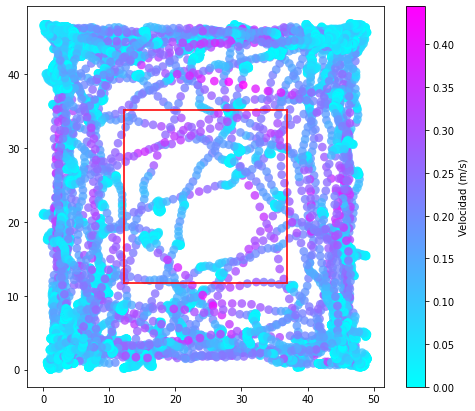

In [41]:
# Definiomos el Path a la locacion del archivo en nuestro Drive
# Elegimos el nombre del archivo: 'datos_procesados.csv'
path_imagen = root_dir + 'imagen_velocidad_raton.jpeg'

# Definimos la figura y el tamaño que tendrá
fig,ax= plt.subplots(figsize=(8,7))

# Dibujamos un rectangulo que delimita el centro
rectangulo = mpl.patches.Rectangle(vertice, ancho, alto, fill=False, alpha = 0.8, color='red',linewidth=2)
ax.add_patch(rectangulo)

# Pueden probar cambiar el estilo descomentando esta linea
# Prueben variando los parametros s, alpha y edgecolor
plt.scatter(X_vector,Y_vector, color=mpl.cm.cool(velocidad_normalizada), s=75, edgecolor='none', alpha=0.8)

# Las siguientes lineas son para agregar la barra de referencia a la derecha
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=min_velocidad, vmax=max_velocidad)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='Velocidad (m/s)')

plt.savefig(path_imagen,dpi=500)
plt.show()

### 5. **Desafío**

Si lograste completar el notebook y llegar hasta acá, te proponemos un desafío para seguir practicando los contenidos que adquirimos durante el taller.

*   Agregar al dataset la columna `'Esquina'` que diga si el ratón se encuentra en alguna de las 4 esquinas del campo.
*   Responder: ¿Se mueve mas lento cuando está en las esquinas?
*   Responder: ¿Pasa más tiempo en las esquinas al principio, al medio, o al final del experimento?

